# TensorFlow Linear Function

Below is implementation of logistic classifier using TensorFlow.

Will be classifying the handwritten numbers 0, 1, and 2 from the MNIST dataset using TensorFlow

Below is a small sample of the data you'll be training on.


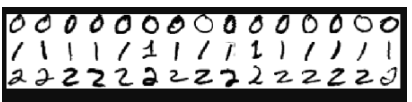

The images below are trained weights for each label (0, 1, and 2). The weights display the unique properties of each digit they have found

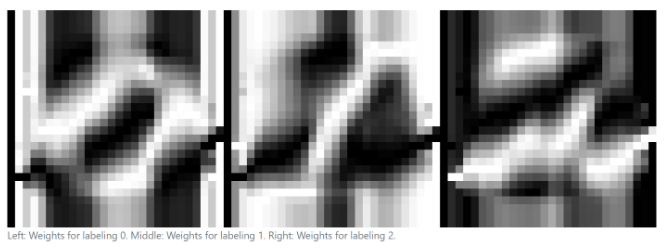

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def get_weights(n_features,n_labels):
    weights = tf.variable(tf.truncated_normal(n_features,n_labels))
    return weights
    
def get_biases(n_labels):
    bias = tf.variable(tf.zeros(n_labels))
    return bias

def linear(x,w,b):
    linear_comb = tf.add(tf.matmul(x,w), b)
    
    
    

Instructions for updating:
non-resource variables are not supported in the long term


We can’t train a neural network on a single sample. Let’s apply n samples of x to the function y = Wx + b, which becomes Y = WX + B.


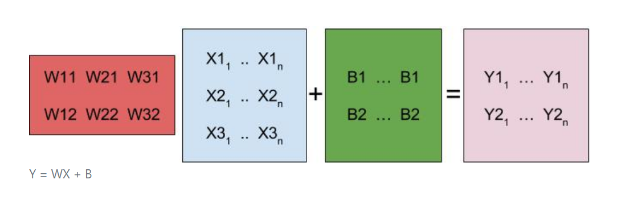


For every sample of X (X1, X2, X3), we get logits for label 1 (Y1) and label 2 (Y2).

In order to add the bias to the product of WX, we had to turn b into a matrix of the same shape. This is a bit unnecessary, since the bias is only two numbers. It should really be a vector.

We can take advantage of an operation called broadcasting used in TensorFlow and Numpy. This operation allows arrays of different dimension to be multiplied with each other

Scores in context of logistic regression is also called Logits.


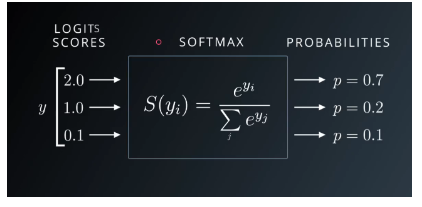

### Softmax


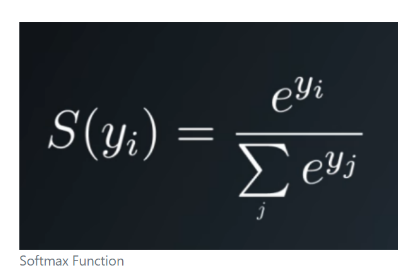


After successfully implementing a linear function that outputs logits. We're one step closer to a working classifier.

The next step is to assign a probability to each label, which we can then use to classify the data. Use the softmax function to turn our logits into probabilities.

We can do this by using the formula above, which uses the input of y values and the mathematical constant "e" which is approximately equal to 2.718. By taking "e" to the power of any real value we always get back a positive value, this then helps us scale when having negative y values. The summation symbol on the bottom of the divisor indicates that we add together all the e^(input y value) elements in order to get our calculated probability outputs.


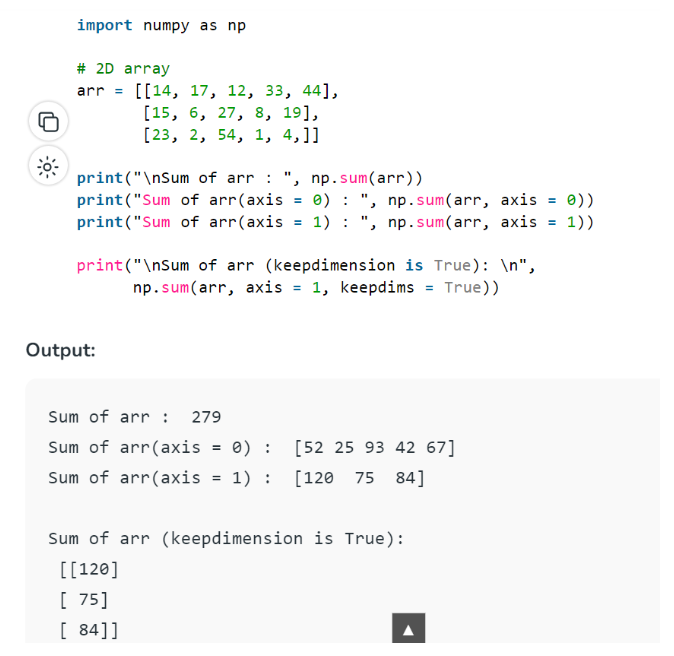

In [2]:
import numpy as np


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # Here result of np.sum(np.exp(logits1), axis=0)) will be brodcasted vertically and thus will 
    # be able to divide by each element in numpy array
    return np.exp(x)/np.sum(np.exp(x),axis=0) # along axis 0 means values of each column will be summed up
    

logits = np.array([
    [1, 2, 3, 6],
    [2, 4, 5, 6],
    [3, 8, 7, 6]])

print(softmax(logits))


[[0.09003057 0.00242826 0.01587624 0.33333333]
 [0.24472847 0.01794253 0.11731043 0.33333333]
 [0.66524096 0.97962921 0.86681333 0.33333333]]


### softmax in tenserflow

In tenserflow softmax will be implemented straightforward like below

x = tf.nn.softmax(Logits)

x = tf.nn.softmax([2.0, 1.0, 0.2])


### one hot encoding

In one hot encoding the label of correctly classified class (i.e probability close to 1) will be 1 and for other incorrectly 
classified class it will be 0




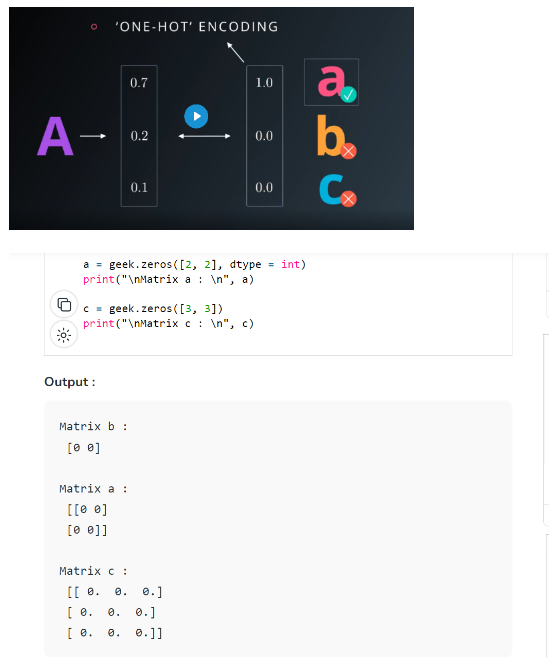

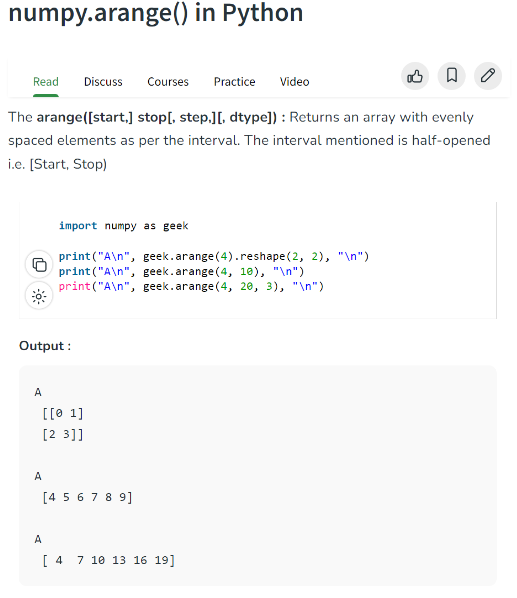




For Advance indexing with numpy array refer 
https://www.geeksforgeeks.org/indexing-in-numpy/

In [3]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

# one hot encoding
temp_train = np.zeros([y_train.shape[0],y_train.max()+1],dtype = np.float32)
temp_train[np.arange(y_train.shape[0]),y_train] = 1
y_train = temp_train

temp_test = np.zeros([y_test.shape[0],y_test.max()+1],dtype = np.float32)
temp_test[np.arange(y_test.shape[0]),y_test] = 1
y_test = temp_test



### Cross Entropy 
problem with one hot encoding is that for very large number of classes our vector become very large with mostly zeros. Let's say for thousands of classes we will have thousands of zeros in our very large vector and that's become very inefficient

To solve above and to see how well we are doing we can compare the two vectors i.e vector from our classifier and our one hot encoding vector. The way to measure distance between above two vectors is known as cross entropy. As we can see below the lesser the probability the higher is the distance thus higher is the cross entropy.


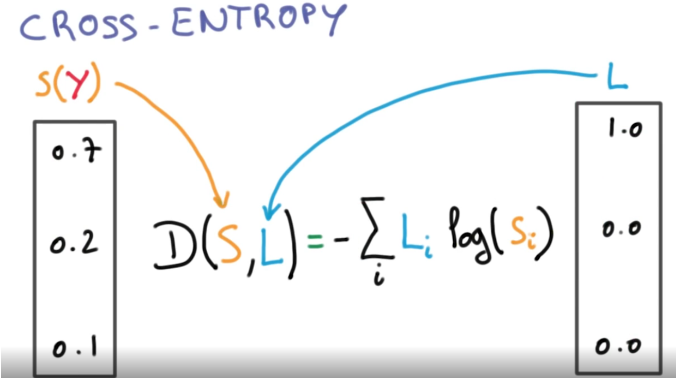
In order to avoid taking log of zero will take the log of vector from the distribution instead of the one hot encoded vector 


### Multinomial logistic classification

The entire setting below is know as Multinomial logistic classification.


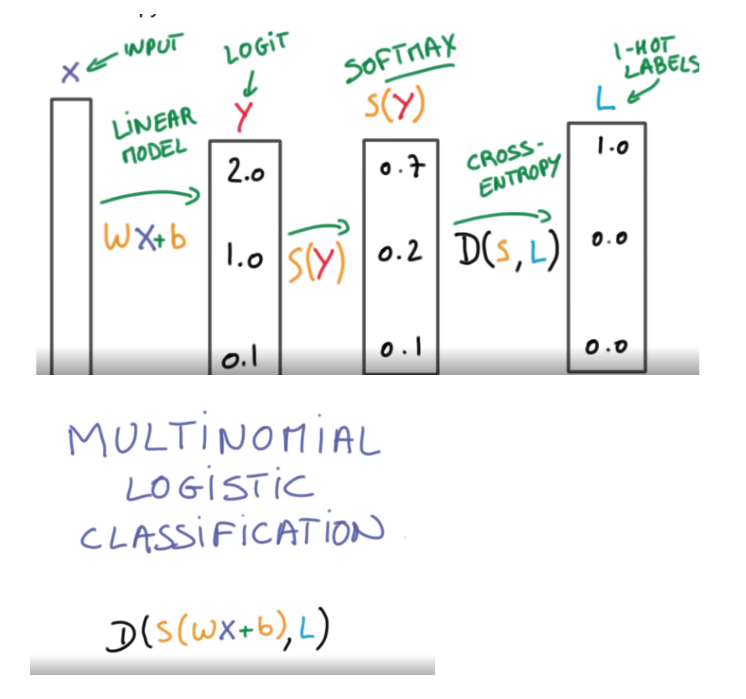

### Loss

Loss function is simply the measure of distance averaged over entire training set for all the inputs and all the labels available. This is called our Training Loss

And now our goal is to minimize this Training loss.


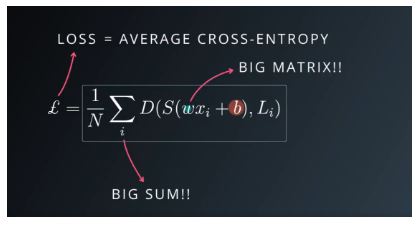

And to minimize this Loss function we can use Gradient Descent. Will take partial derivative of Loss with respect to parameters and move in negative direction of the derivate until we reach the bottom


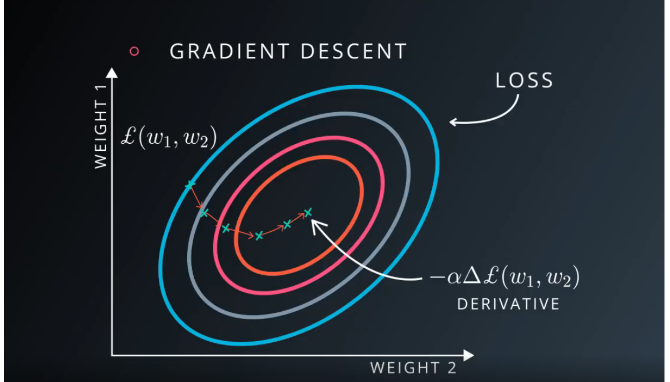

In [4]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

# Flattening the matrix for training set and test set
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


# one hot encoding for the lables in train and test
temp_train = np.zeros([y_train.shape[0],y_train.max()+1],dtype = np.float32)
temp_train[np.arange(y_train.shape[0]),y_train] = 1
y_train = temp_train

temp_test = np.zeros([y_test.shape[0],y_test.max()+1],dtype = np.float32)
temp_test[np.arange(y_test.shape[0]),y_test] = 1
y_test = temp_test

# Setting the values for number of features and number of labels and learning rate
n_features = x_train.shape[1] # 28 * 28 = 784
n_labels = y_train.shape[1] # 10
learning_rate = 0.001


# Creating a placeholder for features, and labels where rows will be None i.e size of batch is not fixed it can take any size.
# This will be help us to pass batches of any size at the time of execution in session
features = tf.placeholder(tf.float32,[None,n_features])
labels = tf.placeholder(tf.float32,[None,n_labels])

# Defining the weights and bias with random normalised values
weights = tf.Variable(tf.random_normal([n_features,n_labels]))
bias = tf.Variable(tf.random_normal([n_labels]))

# Finding Logits through linear combination (xw+b)
logits = tf.add(tf.matmul(features,weights),bias)

# Defining loss function and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Numerical Stability or the importance of Normalization

Below you can see two cases

In case 1 :- 
we are taking a very large number a in billions and subtracting it by 0.000001 by millions of times and printing the distance which comes 0.953

In case 2 :-
when we replace the process with a = 1 then we get error close to 0.999 , this shows we should take normalised values in order to reduce the error in our processing i.e it never gets too big or too small. 

Ideal condition 



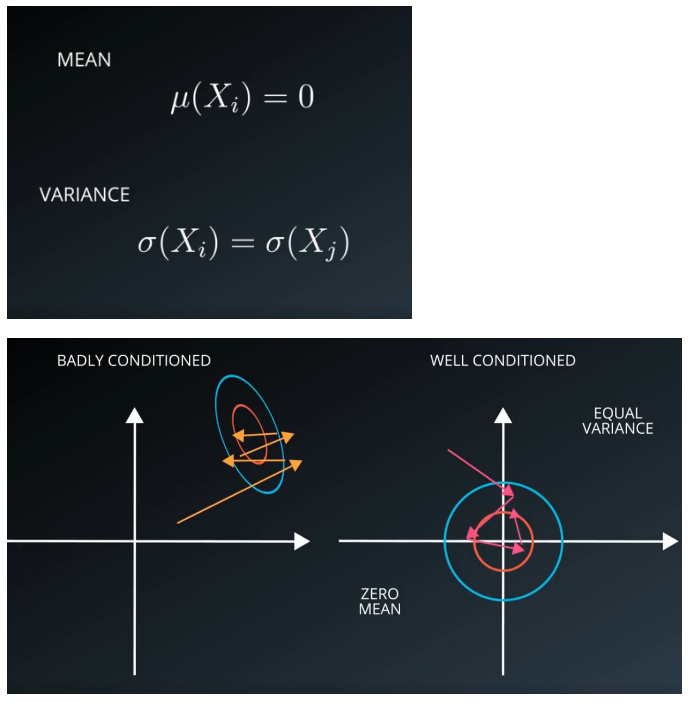

In [5]:
a = 1000000000
for i in range(1000000):
    a = a + 1e-6
print(a - 1000000000)


0.95367431640625


In [6]:
a = 1
for i in range(1000000):
    a = a + 1e-6
print(a - 1)

0.9999999999177334


### Normalized Inputs And Initial Weights

For Example in case of our images where pixels range from 0 - 255, we can subtract the pixel by 128 and can divide it by 128.
Doing this will not change the content of your image, but it makes easier for our optimzer to proceed numerically.



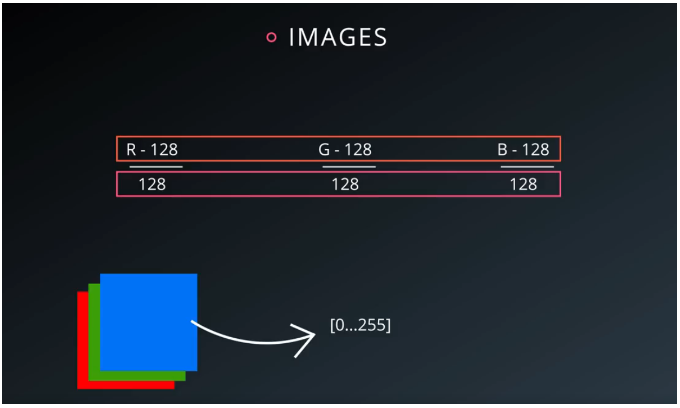

Similarly to initialize weights we use normal distribution with small sigma preferred as compared to large sigma


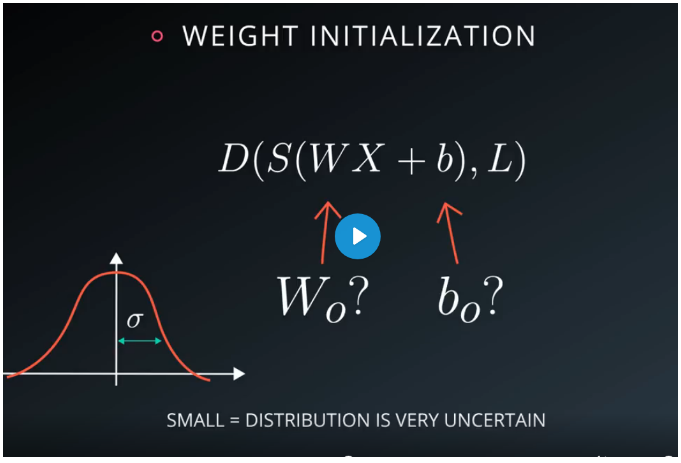

Initialize the logistic classifier



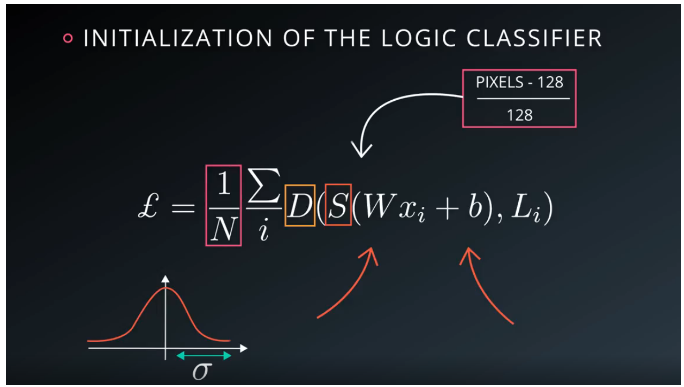

### Optimization



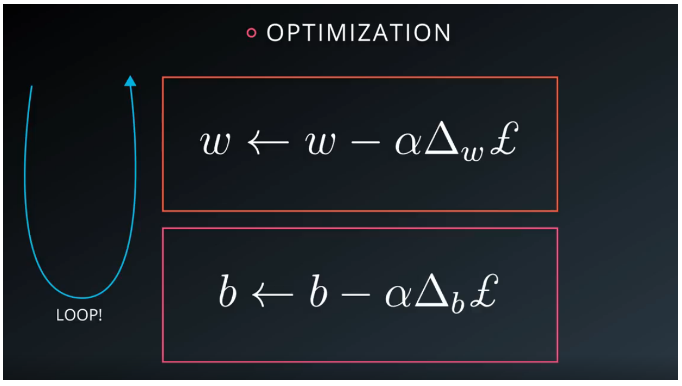

Tenserflow has built in function for optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)



### Measuring Performance

Train Test bleed is when some of your testing images are overly similar to your training images. For example, if you have duplicate images in your dataset, you want to make sure that these do not enter different train, validation, test splits, since their presence will bias your evaluation metrics.

Problem :- test data bleeds into training data

To solve this never touch testing data until you made final decision. Use validation set to measure actual error and let it bleed into training set. You always have test set to rely on to measure your real performance.





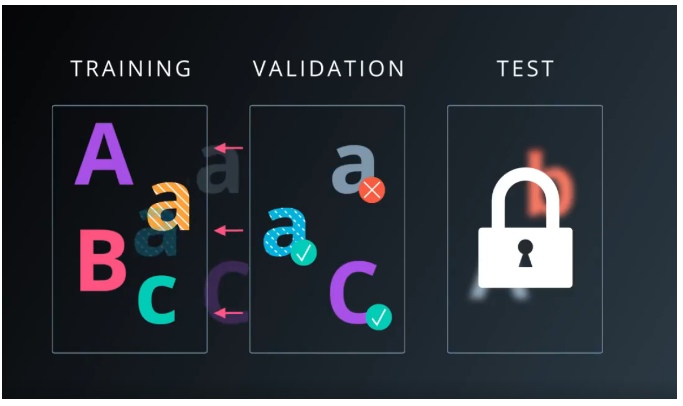

In [7]:
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches

In [8]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

# Flattening the matrix for training set and test set
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


# one hot encoding for the lables in train and test
temp_train = np.zeros([y_train.shape[0],y_train.max()+1],dtype = np.float32)
temp_train[np.arange(y_train.shape[0]),y_train] = 1
y_train = temp_train

temp_test = np.zeros([y_test.shape[0],y_test.max()+1],dtype = np.float32)
temp_test[np.arange(y_test.shape[0]),y_test] = 1
y_test = temp_test

# Setting the values for number of features and number of labels and learning rate
n_features = x_train.shape[1] # 28 * 28 = 784
n_labels = y_train.shape[1] # 10


# Creating a placeholder for features, and labels where rows will be None i.e size of batch is not fixed it can take any size.
# This will be help us to pass batches of any size at the time of execution in session
features = tf.placeholder(tf.float32,[None,n_features])
labels = tf.placeholder(tf.float32,[None,n_labels])

# Defining the weights and bias with random normalised values
weights = tf.Variable(tf.random_normal([n_features,n_labels]))
bias = tf.Variable(tf.random_normal([n_labels]))

# Finding Logits through linear combination (xw+b)
logits = tf.add(tf.matmul(features,weights),bias)

# Defining loss function and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)


# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Parameters to tweak
learning_rate = 0.001
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

# Initializing to store the state in the session .
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # Training optimizer for all the batches
    for batch_features, batch_lables in batches(batch_size, x_train, y_train):
        sess.run(optimizer, feed_dict = {features:batch_features, labels:batch_lables})

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: x_test, labels: y_test})

print('Test Accuracy: {}'.format(test_accuracy))



                 

Test Accuracy: 0.8145999908447266


### Cross Validation

look at it


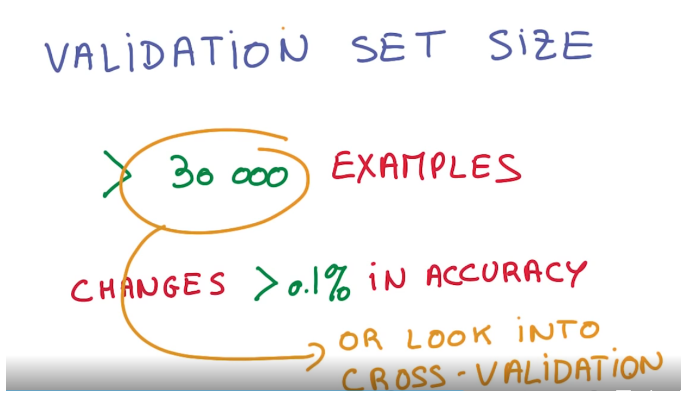

### Stochastic Gradient Descent

Problem with scaling gradient descent is Computing Gradient  descent is 3 times the steps to compute loss function. And we will also take large amount of data in order to make gains.


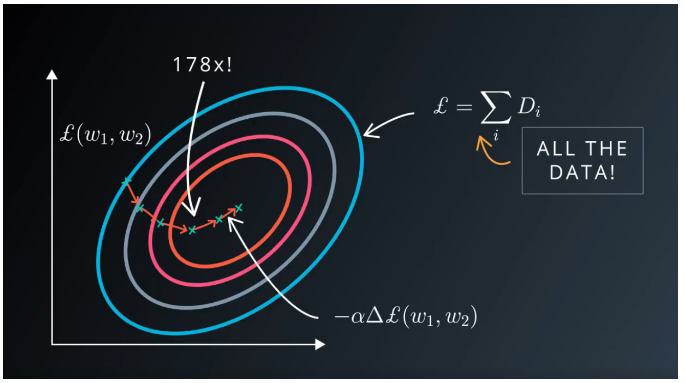

Instead of computing loss we gonna make estimate of it i.e will compute avergae loss and gradient of very small RANDOM fraction of training data. The picking of data should be strictly random. Each step is cheaper to execute but 
Instead of taking one large step and computing gradient descent we will take many smaller steps instead of one large step.

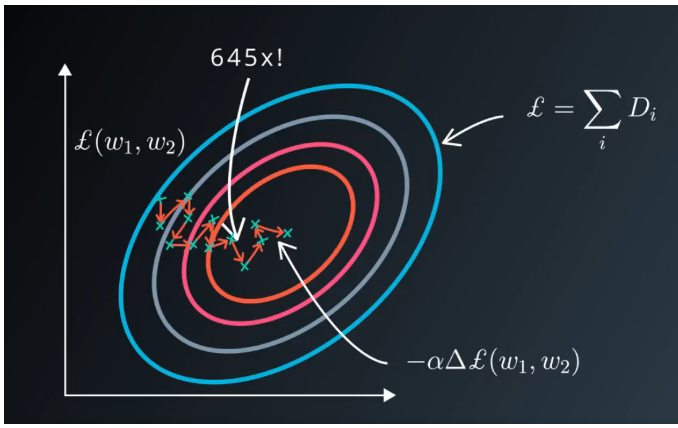


### Momentum and Learning Rate Decay



Helping SDG

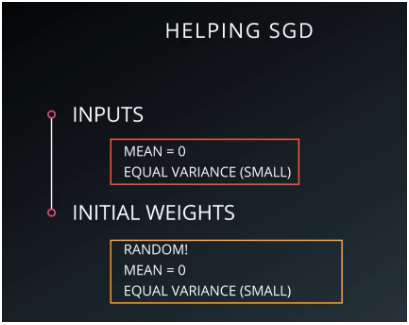

Momentum

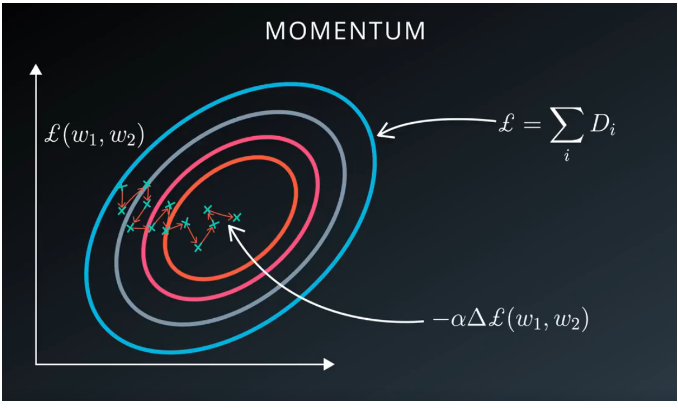

Learning Rate Decay

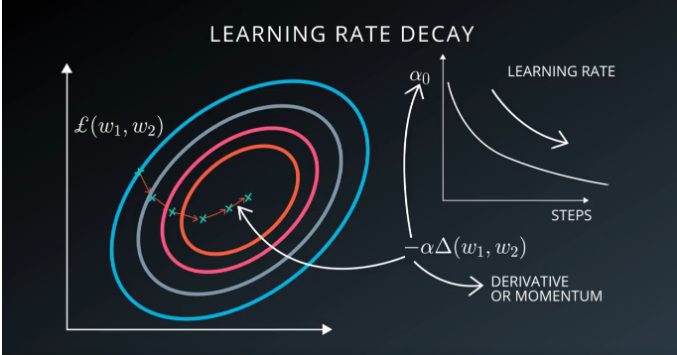


### Lower Learning rate is better than higher learning rate

Lower learning rate reduces the loss better than higher learning rate,
Higher learning rate may start reducing the loss faster but over the time it's start to plateau


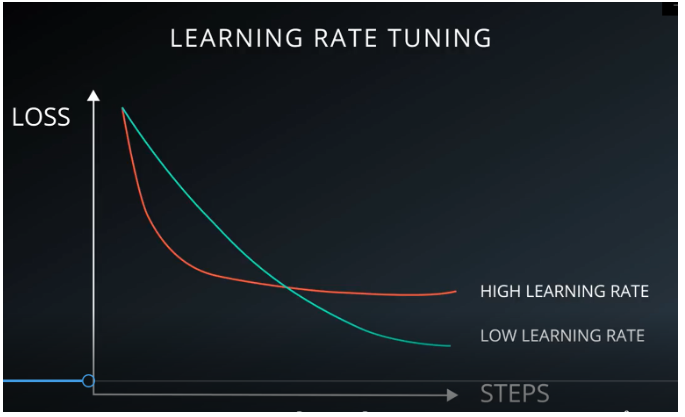

Other Hyper Parameters to tweak

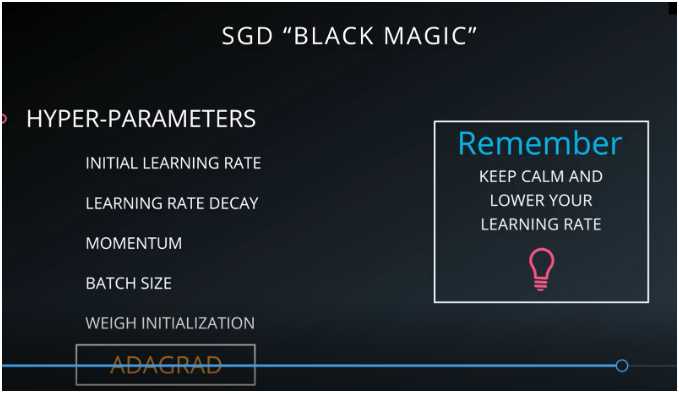


### Epochs
An epoch is a single forward and backward pass of the whole dataset. This is used to increase the accuracy of the model without requiring more data. This section will cover epochs in TensorFlow and how to choose the right number of epochs.

The following TensorFlow code trains a model using 10 epochs.



In [9]:
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches

In [10]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        loss,
        feed_dict={features: last_features, labels: last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: valid_features, labels: valid_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))


(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32') 

# Flattening the matrix for training set and test set
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


# one hot encoding for the lables in train and test
temp_train = np.zeros([y_train.shape[0],y_train.max()+1],dtype = np.float32)
temp_train[np.arange(y_train.shape[0]),y_train] = 1
y_train = temp_train

temp_test = np.zeros([y_test.shape[0],y_test.max()+1],dtype = np.float32)
temp_test[np.arange(y_test.shape[0]),y_test] = 1
y_test = temp_test

valid_features =  x_test
valid_labels = y_test

# Setting the values for number of features and number of labels and learning rate
n_features = x_train.shape[1] # 28 * 28 = 784
n_labels = y_train.shape[1] # 10


# Creating a placeholder for features, and labels where rows will be None i.e size of batch is not fixed it can take any size.
# This will be help us to pass batches of any size at the time of execution in session
features = tf.placeholder(tf.float32,[None,n_features])
labels = tf.placeholder(tf.float32,[None,n_labels])

# Defining the weights and bias with random normalised values
weights = tf.Variable(tf.random_normal([n_features,n_labels]))
bias = tf.Variable(tf.random_normal([n_labels]))

# Finding Logits through linear combination (xw+b)
logits = tf.add(tf.matmul(features,weights),bias)

# Defining loss function and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)


# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Parameters to tweak
learning_rate = 0.001
batch_size = 128
epochs = 50
assert batch_size is not None, 'You must set the batch size'

# Initializing to store the state in the session .
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle
    for epoch_i in range(epochs):
        # Training optimizer over all the batches
        for batch_features, batch_lables in batches(batch_size, x_train, y_train):
            train_feed_dict = {features:batch_features, labels:batch_lables}
            sess.run(optimizer, feed_dict = train_feed_dict)
            
        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_lables)

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: x_test, labels: y_test})

print('Test Accuracy: {}'.format(test_accuracy))





Epoch: 0    - Cost: 2.77e+02 Valid Accuracy: 0.815
Epoch: 1    - Cost: 1.84e+02 Valid Accuracy: 0.844
Epoch: 2    - Cost: 1.44e+02 Valid Accuracy: 0.856
Epoch: 3    - Cost: 1.16e+02 Valid Accuracy: 0.863
Epoch: 4    - Cost: 1.05e+02 Valid Accuracy: 0.867
Epoch: 5    - Cost: 93.8     Valid Accuracy: 0.871
Epoch: 6    - Cost: 85.1     Valid Accuracy: 0.873
Epoch: 7    - Cost: 76.9     Valid Accuracy: 0.873
Epoch: 8    - Cost: 72.5     Valid Accuracy: 0.875
Epoch: 9    - Cost: 67.3     Valid Accuracy: 0.877
Epoch: 10   - Cost: 61.6     Valid Accuracy: 0.876
Epoch: 11   - Cost: 57.8     Valid Accuracy: 0.877
Epoch: 12   - Cost: 54.7     Valid Accuracy: 0.877
Epoch: 13   - Cost: 51.4     Valid Accuracy: 0.877
Epoch: 14   - Cost: 49.2     Valid Accuracy: 0.876
Epoch: 15   - Cost: 46.6     Valid Accuracy: 0.875
Epoch: 16   - Cost: 43.9     Valid Accuracy: 0.877
Epoch: 17   - Cost: 41.9     Valid Accuracy: 0.876
Epoch: 18   - Cost: 40.2     Valid Accuracy: 0.878
Epoch: 19   - Cost: 38.1     Va